# Assignment 5:

Using the same dataset (Housing) from assignment 04.

Two models are to be applied on that preprocessed data,
1. Linear &
2. Logistic Regression.

The continuous output needs to be converted into a categorical one based on certain thresholds and logistic regression is to be applied. Finally, the regression model is to be evaluated based on RMSE/MSE etc and the logistic regression model on prediction accuracy.

Data sets available in the following file:\
https://docs.google.com/spreadsheets/d/1WjGupcDjBAyHpAEoigxkcmtLmzMYMOTFBH2J3fKNEwk/edit?gid=0#gid=0

<font color=Ff0000, size=4><b>Disclaimer:</b></font><br>
<font size=4><b>There are slight changes in pre-processing from Assignment 4.<br>The sample data was accessed from local folder.</b></font>

In [115]:
((1 + 6 + 2 + 1) % 5) + 1

1

## Data Pre-processing:

In [116]:
#importing necessary libraries
import pandas as pd
import numpy as np

### Removing/Imputing Null values


In [117]:
housing = pd.read_csv('sample_data/Housing Price.csv')
print(housing.shape)
print("="*80)
print(housing.isnull().sum())

(545, 13)
price               0
area                9
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [118]:
housing.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,NaN,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,NaN,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,NaN,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,NaN,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,NaN,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,NaN,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,NaN,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [119]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

features_for_imputation = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=1)
housing[features_for_imputation] = imputer.fit_transform(housing[features_for_imputation])

housing[features_for_imputation[1:]] = housing[features_for_imputation[1:]].astype(int)

In [120]:
housing.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.00,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.00,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.00,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7510.10,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7517.30,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7971.85,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,6710.65,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,6165.10,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,5183.20,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,7111.30,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


### Removing duplicates

In [121]:
print("Shape before removing duplicates: ", housing.shape)

housing = housing.drop_duplicates()

print("Shape after removing duplicates: ", housing.shape)

Shape before removing duplicates:  (545, 13)
Shape after removing duplicates:  (545, 13)


No duplicates were found in this dataset.

### Handling categorical variables/Feature Engineering

In [122]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int32  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int32  
 3   bathrooms         545 non-null    int32  
 4   stories           545 non-null    int32  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int32  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int32(5), object(7)
memory usage: 44.8+ KB


In [123]:
columns = []

for column in housing.columns:
	if housing[column].dtypes == object:
		columns.append(column)

print(columns,"\n"+"="*35)

for column in columns:
	print(f"{column}: {housing[column].unique()}")

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'] 
mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [124]:
for column in columns[:len(columns)-1]:
	housing[column] = housing[column].map({'no':0,'yes':1})

housing['furnishingstatus'] = housing['furnishingstatus'].map({'furnished':2,'semi-furnished':1, 'unfurnished':0})

In [125]:
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.00,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960.00,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960.00,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7510.10,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7517.30,4,1,2,1,1,1,0,1,2,0,2
5,10850000,7971.85,3,3,1,1,0,1,0,1,2,1,1
6,10150000,6710.65,4,3,4,1,0,0,0,1,2,1,1
7,10150000,6165.10,5,3,2,1,0,0,0,0,0,0,0
8,9870000,5183.20,4,1,2,1,1,1,0,1,2,1,2
9,9800000,7111.30,3,2,4,1,1,0,0,1,1,1,0


### Feature Scaling:

In [126]:
print(housing.var())

price               3.498544e+12
area                4.343830e+06
bedrooms            5.447383e-01
bathrooms           2.524757e-01
stories             7.525432e-01
mainroad            1.215461e-01
guestroom           1.465731e-01
basement            2.280559e-01
hotwaterheating     4.384781e-02
airconditioning     2.163923e-01
parking             7.423300e-01
prefarea            1.800324e-01
furnishingstatus    5.796883e-01
dtype: float64


In [127]:
# 'area' has much higher magnitude of variance than others.
#  and requires scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

housing[['area']] = scaler.fit_transform(housing[['area']])

housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.413620,4,2,3,1,0,0,0,1,2,1,2
1,12250000,0.524014,4,4,4,1,0,0,0,1,3,0,2
2,12250000,0.595699,3,2,2,1,0,1,0,0,2,1,1
3,12215000,0.420079,4,2,2,1,0,1,0,1,3,1,2
4,11410000,0.420595,4,1,2,1,1,1,0,1,2,0,2
5,10850000,0.453179,3,3,1,1,0,1,0,1,2,1,1
6,10150000,0.362771,4,3,4,1,0,0,0,1,2,1,1
7,10150000,0.323663,5,3,2,1,0,0,0,0,0,0,0
8,9870000,0.253276,4,1,2,1,1,1,0,1,2,1,2
9,9800000,0.391491,3,2,4,1,1,0,0,1,1,1,0


### Feature Selection:

In [128]:
housing_corr = housing.iloc[:, 1:].corr()

housing_corr

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
area,1.000000,0.126674,0.171986,0.081706,0.293121,0.149630,0.043113,-0.008917,0.224312,0.358015,0.232708,0.174600
bedrooms,0.126674,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.171986,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.081706,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.293121,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.149630,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.043113,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,-0.008917,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.224312,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477
parking,0.358015,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627,0.177539


<Axes: >

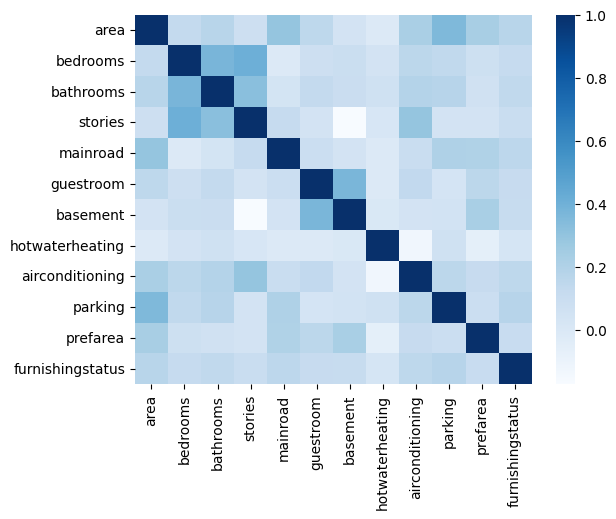

In [129]:
import seaborn as sns

color  = 'Blues'

sns.heatmap(housing_corr, cmap = color)

It seems that no two columns are correlated more than 0.8 with each other so we can't drop any columns.

## Regression:

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [131]:
x = housing.iloc[:, 1:]
y = housing.iloc[:, 0]

### Linear Regression:

In [132]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, random_state = 0, shuffle=True)

model = LinearRegression()
model.fit(xTrain, yTrain)
yPrediction = model.predict(xTest)

for i in range(len(yPrediction)):
	yPrediction[i]=int(yPrediction[i])

print(yPrediction)# printing predictions

mse = mean_squared_error(yTest, yPrediction)
rmse = np.sqrt(mse)
r_squared = r2_score(yTest, yPrediction)

print("\nMSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r_squared)


[ 4045584.  6204508.  4463256.  7097706.  2905064.  7078278.  3317055.
  3196479.  3577818.  8337712.  6668790.  3803054.  3748986.  4579762.
  3916848.  2049334.  3927334.  3606005.  3194496.  4696920.  5848785.
  6386601.  4662347.  2771306.  5322286.  5826862.  5345222.  5442576.
  5799932.  5875390.  3310097.  6363575.  7094079.  2971691.  4384168.
  5121923.  4959168.  3653568.  2957424.  3991095.  8066629.  5016313.
  6466850.  3548479.  3968816.  6351982.  4506017.  2738381.  4119660.
  6566260.  3983750.  7003972.  2604869.  2950025.  3551614.  5144831.
  7125991.  4093499.  2892405.  4311746.  5913746.  6791606.  3440501.
  7257125.  2686069.  5206813.  6705676.  2583146.  3830023.  5012190.
  4431466.  7276645.  5225443.  6000429.  4059393.  4577477.  3005594.
  7731688.  2670833.  3712415.  4431466.  5884146.  5191895.  5413769.
  3850970.  4187229.  4685689.  4983590.  3935277.  4333450.  3200339.
  5828301.  3157059.  3676537.  4702802. 10647322.  2977847.  7179320.
  4342

### Logistic Regression:

In [133]:
print("Max: ", y.max())
print("Min: ", y.min())

diff = y.max()-y.min()
n = 4
divn = int((y.max()-y.min())/n)
print(f"Difference = {diff}, nth div = {divn}")

Max:  13300000
Min:  1750000
Difference = 11550000, nth div = 2887500


In [134]:
divn = 2750000 # estimated split value

split_data = [y.min()]
for i in range(1, n+1):
	split_data.append(split_data[i-1] + divn)

split_data[0]-=1
split_data[-1] = y.max() + 1
print(split_data)

[1749999, 4500000, 7250000, 10000000, 13300001]


In [135]:
y_ctgr = pd.cut(y, bins = split_data, labels = ['Bottom-Tier', 'Mid-Tier', 'Top-Tier', 'Presidential-Tier'])

In [136]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y_ctgr, test_size=0.2, random_state=0)

#Train the model
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)

print(predictions)# printing predictions

print("\nAccuracy Score: ", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n: ", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

['Bottom-Tier' 'Mid-Tier' 'Bottom-Tier' 'Mid-Tier' 'Bottom-Tier'
 'Mid-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Top-Tier'
 'Mid-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Mid-Tier' 'Bottom-Tier'
 'Bottom-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Bottom-Tier'
 'Mid-Tier' 'Mid-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Mid-Tier' 'Mid-Tier'
 'Mid-Tier' 'Mid-Tier' 'Mid-Tier' 'Mid-Tier' 'Bottom-Tier' 'Mid-Tier'
 'Mid-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Mid-Tier'
 'Bottom-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Top-Tier' 'Bottom-Tier'
 'Mid-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Mid-Tier' 'Mid-Tier'
 'Bottom-Tier' 'Bottom-Tier' 'Mid-Tier' 'Bottom-Tier' 'Mid-Tier'
 'Bottom-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Mid-Tier' 'Mid-Tier'
 'Bottom-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Mid-Tier' 'Mid-Tier'
 'Bottom-Tier' 'Top-Tier' 'Bottom-Tier' 'Mid-Tier' 'Mid-Tier'
 'Bottom-Tier' 'Bottom-Tier' 'Bottom-Tier' 'Mid-Tier' 'Top-Tier'
 'Mid-Tier' 'Mid-Tier' 'Bottom-Tier' 'Mid-Tier' 'Bottom-Tier'
 'Presidenti